In [1]:
import osmnx as ox
import os
import folium

In [2]:
# Define the place to search (Lisbon, Portugal)
place_name = "Lisbon, Portugal"

In [3]:
# get all building footprints in some neighborhood
tags = {"building": True}
gdf = ox.features.features_from_place(place_name, tags)
gdf.shape

(51717, 466)

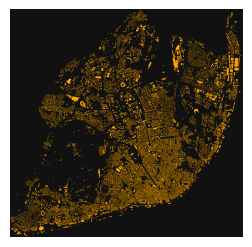

In [4]:
fig, ax = ox.plot.plot_footprints(gdf, figsize=(3, 3))

In [5]:
# get all the parks in some neighborhood
# constrain acceptable `leisure` tag values to `park`
tags = {"leisure": "park"}
gdf = ox.features.features_from_place(place_name, tags)
gdf.shape

(352, 99)

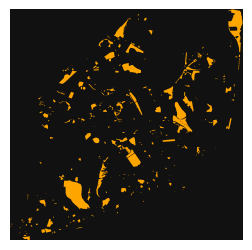

In [6]:
fig, ax = ox.plot.plot_footprints(gdf, figsize=(3, 3))

In [7]:
tags = {"public_transport": "stop_position"}
gdf = ox.features.features_from_place(place_name, tags)
gdf.shape

(2571, 55)

In [8]:
gdf.columns

Index(['geometry', 'bus', 'name', 'network', 'operator', 'public_transport',
       'ref', 'short_name', 'local_ref', 'railway', 'train', 'tram', 'shelter',
       'source', 'name:TML', 'operator:TML', 'subway', 'network:wikidata',
       'operator:wikidata', 'description', 'route_ref', 'name:de', 'name:en',
       'name:ru', 'wheelchair', 'fixme', 'alt_name', 'name:zh', 'station',
       'wikidata', 'amenity', 'ferry', 'tourism', 'tourist_train', 'name:pt',
       'layer', 'tactile_paving', 'note', 'railway:ref', 'bench', 'bin',
       'departures_board', 'toilets:wheelchair', 'mapillary', 'survey:date',
       'cargo', 'old_name', 'website', 'wikipedia', 'ref:operator',
       'operator:wikipedia', 'operator:short_name', 'level',
       'network:wikipedia', 'barrier'],
      dtype='object')

In [9]:
feature_points = gdf.representative_point()

In [10]:
def plot_nodes(gdf):
    m = folium.Map(location=[38.740, -9.150], zoom_start=12.2)  # Centered on Lisbon

    # Add clusters to the map
    for _, row in gdf.iterrows():

        folium.CircleMarker(
            location=(row['geometry'].y, row['geometry'].x),
            radius=5,
            fill=True,
            fill_opacity=0.6,
        ).add_to(m)

    return m

In [11]:
bus = gdf.loc["node"][~gdf.loc["node"].bus.isna()][['name', 'geometry']].reset_index(drop=True)
bus = bus.drop_duplicates(subset='name', keep='first')
m = plot_nodes(bus)
m

In [12]:
trams = gdf[~gdf.tram.isna()][['name', 'geometry']].reset_index(drop=True)
trams = trams.drop_duplicates(subset='name', keep='first')
m = plot_nodes(trams)
m

In [14]:
def save_geojson(gdf, file_name):
    base_path = "../data/geojson/"
    with open(os.path.join(base_path, file_name), "w") as f:
        f.write(gdf.to_json())

In [15]:
save_geojson(bus, "autocarros.geojson")
save_geojson(trams, "eletricos.geojson")